In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import argparse
import ast
import json

Plot boxplots from data

In [150]:
def load_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def merge_json_data(data):
    merged_data = {}
    for file, json_data in data.items():
        for key, value in json_data.items():
            
            if key not in merged_data:
                merged_data[key] = []
            if key == "type":
                merged_data[key] = value
            elif key == "memory_size":
                merged_data[key] = value
            else:
                value = ast.literal_eval(value)
                merged_data[key].append(value)
    return merged_data

def load_json_files(folder):
    files = os.listdir(folder)
    data = {}
    for file in files:
        if file.endswith('.json'):
            data[file] = load_json(os.path.join(folder, file))

    merged_data = merge_json_data(data)
    return merged_data

def load_experiments(folder):
    experiments = {}
    for obj in os.listdir(folder):
        path = os.path.join(folder, obj)
        if os.path.isdir(path): # is directory
            if "OneHot" in obj:
                name = "OneHot"
            elif "Tanh" in obj:
                name = "Tanh"
            elif "Bottleneck" in obj:
                name = "Bottleneck"
            else:
                print(f"Unknown object {obj}")
            memory = obj.split("_")[-1]
            experiments[name + memory] = load_json_files(os.path.join(folder, obj))
    return experiments

experiments = load_experiments("experiments_extraction/network-3-8-10")


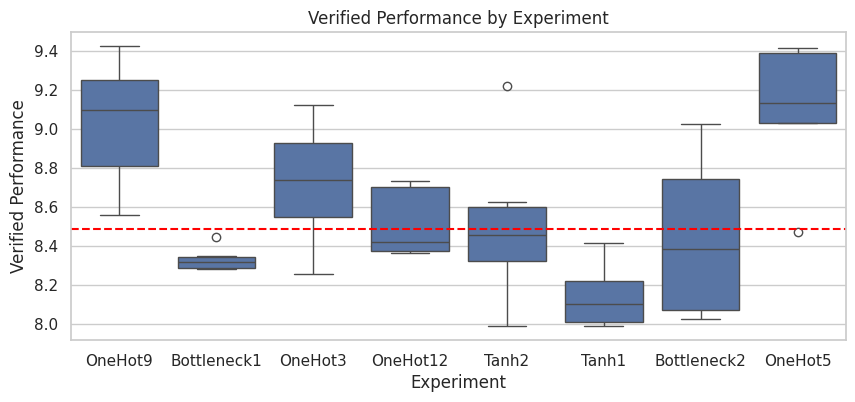

In [ ]:
def plot_boxplots_verified_performance(experiments):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.set_theme(style="whitegrid")
    data = []

    for name, experiment in experiments.items():
        for key, value in experiment.items():
            if key == "verified_performance":
                data.append([name, value])

    df = pd.DataFrame(data, columns=["Experiment", "Verified Performance"])
    df = df.explode("Verified Performance")
    df["Verified Performance"] = df["Verified Performance"].astype(float)
    # Remove outlier from Bottleneck1
    df = df[~((df["Experiment"] == "Bottleneck1") & (df["Verified Performance"] > 15.0))]
    sns.boxplot(x="Experiment", y="Verified Performance", data=df, ax=ax)
    ax.set_title("Verified Performance by Experiment")
    # Add maximum value line
    max_value = max(experiments["OneHot3"]["original_rl_reward"])
    ax.axhline(max_value, color='red', linestyle='--', label='Max Value')
    plt.show()

plot_boxplots_verified_performance(experiments)

OneHot9
Bottleneck1
OneHot3
OneHot12
Tanh2
Tanh1
Bottleneck2
OneHot5


/tmp/ipykernel_6042/253373989.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_long, x="Epoch", y="Accuracy", hue="Experiment", ci="sd")


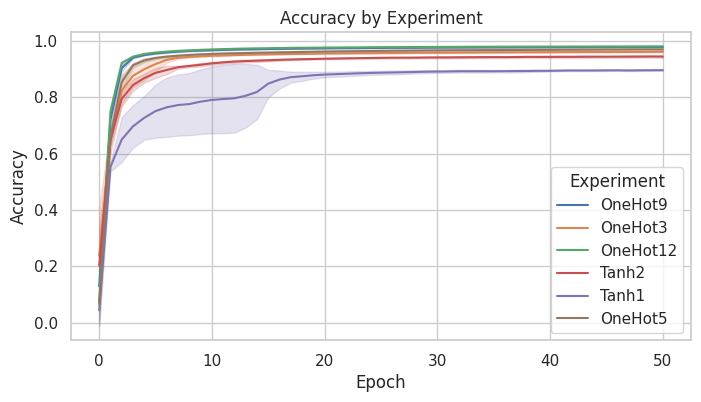

In [152]:
def plot_accuracies_convergence_curves(experiments):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.set_theme(style="whitegrid")
    data = []

    for name, experiment in experiments.items():
        print(name)
        if "Bottleneck" in name:
            continue
        for key, value in experiment.items():
            if key == "accuracies":
                data.append([name, value])

    df = pd.DataFrame(data, columns=["Experiment", "Accuracy"])
    
    df = df.explode("Accuracy")
    records = []
    for idx, row in df.iterrows():
        for epoch, acc in enumerate(row["Accuracy"]):
            records.append({
                "Experiment": row["Experiment"],
                "Epoch": epoch,
                "Accuracy": acc
            })

    df_long = pd.DataFrame(records)
    
    sns.lineplot(data=df_long, x="Epoch", y="Accuracy", hue="Experiment", ci="sd")

    ax.set_title("Accuracy by Experiment")
    plt.show()

plot_accuracies_convergence_curves(experiments)